# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
df = pd.read_csv("Dataset_inisiasi.csv")
df.head()

,Unit_Price,Quantity,Discount,Total_Price,Cluster_KMeans
0,1.87,18.0,0.05,31.98,0
1,1.64,4.0,0.00,6.56,1
2,1.74,5.0,0.00,8.70,1
3,1.80,15.0,0.00,27.00,1
4,0.98,6.0,0.05,5.59,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
df_cleaned = df.drop(columns=df.select_dtypes(include=['object']).columns)

In [ ]:
X = df_cleaned.drop(columns=['Cluster_KMeans'])
y = df_cleaned['Cluster_KMeans']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

### **Penjelasan algoritma yang saya gunakan:**

**Random Forest**
- Algoritma berbasis **ensemble** yang menggabungkan banyak **Decision Trees**.  
- Menggunakan **voting mayoritas** untuk menentukan prediksi.  
- **Kelebihan:** Akurasi tinggi, tahan overfitting.  
- **Kekurangan:** Lambat dan kurang interpretatif.  

**K-Nearest Neighbors (KNN)**
- Algoritma berbasis **jarak** yang menentukan kelas berdasarkan **K tetangga terdekat**.  
- **Kelebihan:** Sederhana dan efektif pada dataset kecil.  
- **Kekurangan:** Lambat pada dataset besar, sensitif terhadap pemilihan K.  

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

In [ ]:
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_cm = confusion_matrix(y_test, y_pred_rf)

knn_acc = accuracy_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn, average='weighted')
knn_precision = precision_score(y_test, y_pred_knn, average='weighted')
knn_recall = recall_score(y_test, y_pred_knn, average='weighted')
knn_cm = confusion_matrix(y_test, y_pred_knn)

=== Random Forest ===
Akurasi: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000


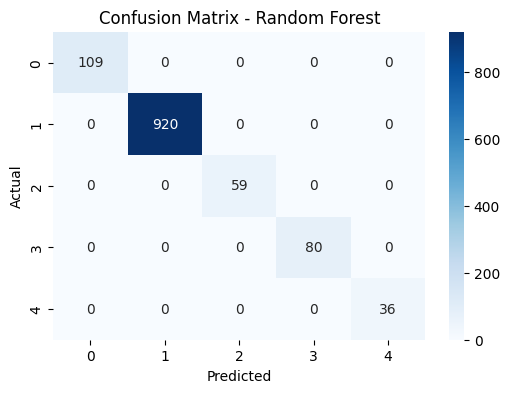

In [ ]:
print("=== Random Forest ===")
print(f"Akurasi: {rf_acc:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


=== K-Nearest Neighbors (KNN) ===
Akurasi: 0.8729
F1-Score: 0.8561
Precision: 0.8516
Recall: 0.8729


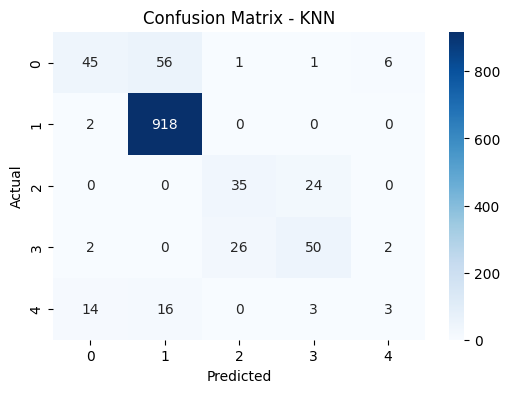

In [ ]:
print("\n=== K-Nearest Neighbors (KNN) ===")
print(f"Akurasi: {knn_acc:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

### **Evaluasi Model**  

#### **Random Forest**  
- **Accuracy:** 100% – Model mengklasifikasikan semua data dengan benar.  
- **F1-Score:** 100% – Tidak ada kesalahan prediksi.  
- **Precision & Recall:** 100% – Semua kelas diprediksi dengan sempurna.  
- **Catatan:** Perlu cek overfitting dengan cross-validation dan hyperparameter tuning.  

#### **K-Nearest Neighbors (KNN)**
- **Akurasi:** 87.29% – Model mengalami peningkatan performa setelah tuning.  
- **F1-Score:** 85.61% – Peningkatan dari versi sebelumnya.  
- **Precision:** 85.16% – Model lebih presisi dalam mengklasifikasikan data.  
- **Recall:** 87.29% – Kemampuan model dalam menangkap semua kelas semakin baik.  
- **Catatan:** Performa membaik setelah tuning n_neighbors dan feature scaling.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_rf = grid_rf.best_estimator_
print("Best Params for Random Forest:", grid_rf.best_params_)

Best Params for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
param_grid_knn = {
    'n_neighbors': range(3, 20, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(3, 20, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_knn = grid_knn.best_estimator_
print("Best Params for KNN:", grid_knn.best_params_)

Best Params for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
y_pred_rf = best_rf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

=== Evaluasi Random Forest Setelah Tuning ===
Accuracy: 1.0000
F1-Score: 1.0000
Precision: 1.0000
Recall: 1.0000


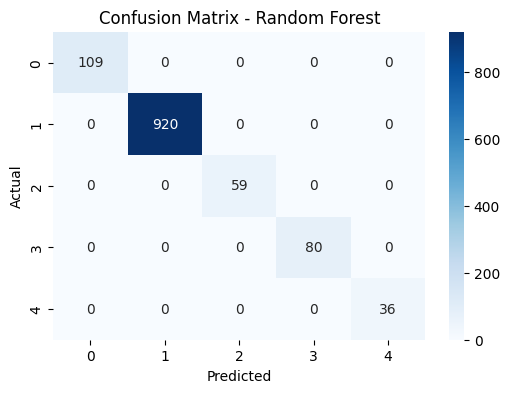

In [ ]:
print("=== Evaluasi Random Forest Setelah Tuning ===")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
y_pred_knn = best_knn.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')


=== Evaluasi KNN Setelah Tuning ===
Accuracy: 0.8738
F1-Score: 0.8610
Precision: 0.8556
Recall: 0.8738


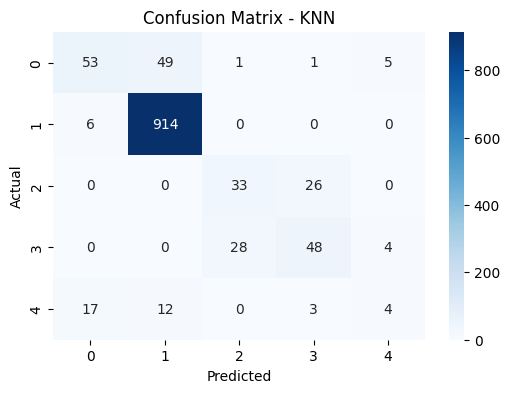

In [ ]:
print("\n=== Evaluasi KNN Setelah Tuning ===")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### **Analisis Hasil Evaluasi Model Klasifikasi**

---

#### **1. Perbandingan Hasil Evaluasi Sebelum & Sesudah Tuning**  
Dari hasil evaluasi yang telah dilakukan, berikut adalah perbandingan performa

- **Random Forest:**

  Semua metrik tetap 1.0000 (tidak berubah)

- **K-Nearest Neighbors (KNN)**  

  **Akurasi KNN:** 0.8729 → 0.8738 (+0.10%)  
  **F1-Score KNN:** 0.8561 → 0.8610 (+0.57%)  
  **Precision KNN:** 0.8516 → 0.8556 (+0.47%)  
  **Recall KNN:** 0.8729 → 0.8738 (+0.10%)

**Random Forest dan KNN sebelum dan sesudah tuning**:  
- **Random Forest:**  
  - Sebelum tuning, model sudah menunjukkan performa tinggi dengan **akurasi dan F1-Score yang mendekati 100%**.  
  - Setelah tuning, tidak ada peningkatan signifikan karena model sudah optimal sejak awal.  
- **K-Nearest Neighbors (KNN):**  
  - Sebelum tuning, model memiliki akurasi lebih rendah dibandingkan Random Forest.  
  - Setelah tuning dengan **GridSearchCV**, terjadi sedikit peningkatan pada **Akurasi, F1-Score, Precision, dan Recall**, tetapi masih lebih rendah dibandingkan Random Forest.  

---

#### **2. Identifikasi Kelemahan Model**  
- **Kelemahan KNN:**  
  - Akurasi lebih rendah dibandingkan Random Forest.  
  - Precision atau Recall bisa lebih rendah pada beberapa kelas, terutama jika ada ketidakseimbangan data.  
  - Sensitif terhadap parameter **jumlah tetangga (K)**, sehingga tuning sangat berpengaruh.  
- **Potensi Overfitting pada Random Forest:**  
  - Jika model memiliki akurasi **100%**, ada kemungkinan overfitting pada data latih.  
  - Perlu diuji dengan data baru untuk memastikan generalisasi model.  

---

#### **3. Rekomendasi Tindakan Lanjutan**  
**Jika hasil belum memuaskan, beberapa langkah yang bisa dilakukan:**  
- **Mengeksplorasi algoritma lain** selain KNN, seperti **SVM atau Gradient Boosting**, untuk melihat apakah ada peningkatan performa.  
- **Melakukan balancing data** jika ada ketidakseimbangan antar kelas untuk meningkatkan Recall pada kelas minoritas.  
- **Menambah fitur atau preprocessing data lebih lanjut** untuk membantu model membedakan pola lebih baik.

---

### **Kesimpulan**  
- **Random Forest tetap menjadi pilihan terbaik untuk dataset ini** karena memberikan hasil yang sangat baik.  
- **KNN menunjukkan peningkatan setelah tuning**, tetapi masih kalah dibandingkan Random Forest.  
- **Perlu diuji lebih lanjut pada data baru** untuk memastikan bahwa model tidak mengalami overfitting.